In [1]:
%%HTML
<h1 style="font-size:40px;font-family:Comic Sans MS;" > PART 2: Artificial Intelligence algorithms </h1>
<p style="font-family:Comic Sans MS;" ><b> by André Devay Torres Gomes (10770089) <b/><p/>

---

## Table of Contents

- Introduction
- Linear Regression (Boston Housing)
- KNN (Adult)
- Nayve Bayes (SMS Spam Collection)
- Neural Networks (MNIST)

# 1. Introduction

 - This notebook is divided into many sessions, each with its database and its AI algorithm. In each session, we will have a new strategy being used of AI, in addition, all sections will follow the same pattern, containing a brief analysis and a development of one AI algorithm.

In [2]:
%%HTML
<img src="https://media1.tenor.com/images/8ef5c7d46f1d869594a8bfc8d90fc753/tenor.gif?itemid=5604922">

 - To hide or show all the code, just click the button below!

In [3]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

# 2. Linear Regression (Boston Housing)


### Environment Setting

Before we start we need set up the environment, please make sure those packages are installed in your computer when you copy this code to the local file.

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, KFold
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, accuracy_score,  mean_squared_error


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy import stats

### Read Data File

The first task is to read data from .csv file.

In [5]:
boston = pd.read_csv( 'D:/tarefa3/boston-housing/boston.csv')

In [6]:
boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [7]:
print ("Database size: ", boston.shape)

Database size:  (333, 15)


In [8]:
boston.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Brief Analysis

Here, we're going to analyze the data and its features to understand their correlations.

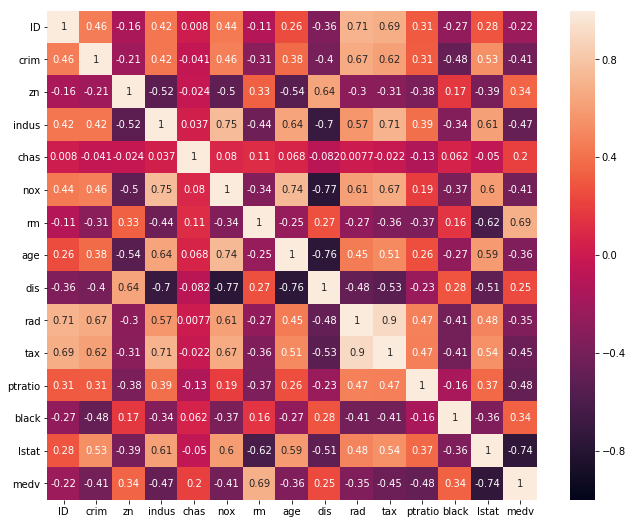

In [9]:
# Plot a correlation matrix

corrmat = boston.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=-1, vmax=1, annot = True, square = True);

 - As we can see above, the 'zn' (proportion of residential land zoned), 'rm' (average number of rooms per dwelling) and 'black' (the proportion of blacks by town) are the most related features with the target.

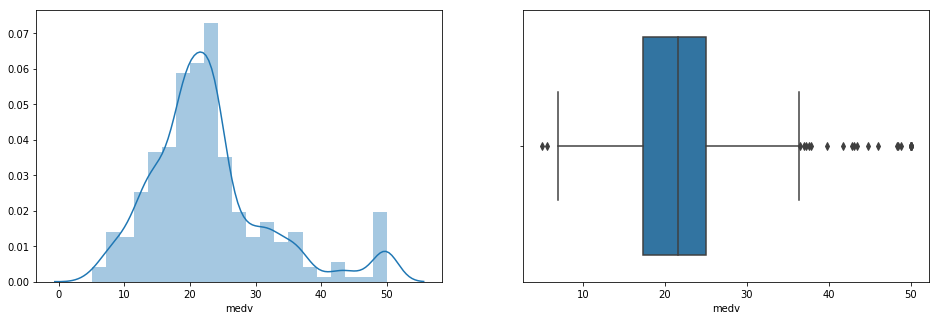

In [10]:
def grafico(col):
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    sns.distplot(col);

    plt.subplot(122)
    sns.boxplot(col);
    

# Plot for target variable

grafico(boston['medv'])

### Use of algorithms

 - Firstly, let's see if there is normally distributed data.


 mu = 22.77 and sigma = 9.16



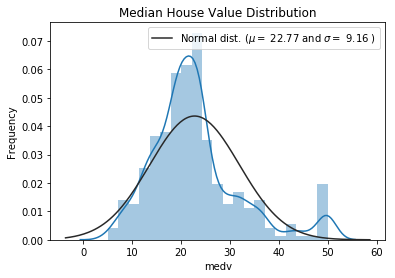

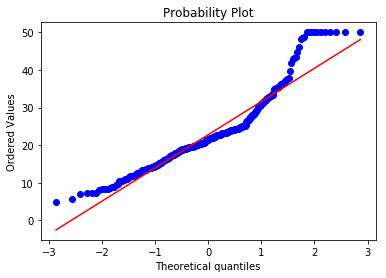

In [11]:
sns.distplot(boston['medv'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(boston['medv'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Median House Value Distribution')

fig = plt.figure()
res = stats.probplot(boston['medv'], plot=plt)
plt.show()

 - We need to transform this variable and make it more normally distributed.


 mu = 3.10 and sigma = 0.38



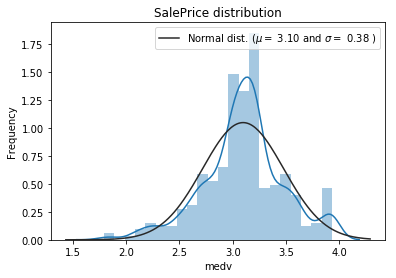

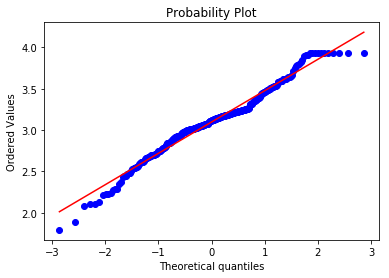

In [12]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
boston["medv"] = np.log1p(boston["medv"])

#Check the new distribution 
sns.distplot(boston['medv'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(boston['medv'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(boston['medv'], plot=plt)
plt.show()

 - Typically, ML algorithms don't perform well when the input numerial attributes have very different scales. So, let's see if the dataset has very different scales between its features.

In [13]:
dataID = boston['ID']
dataMEDIAN = boston['medv']

In [14]:
boston.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,3.097534
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,0.381114
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,1.791759
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,2.912351
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,3.117950
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,3.258097
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,3.931826


In [15]:
scaler = MinMaxScaler()

In [16]:
boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,3.218876
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,3.117950
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,3.538057
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,3.616309
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,3.173878


In [17]:
# Here, we will separate the 'Id' and 'median_house_value' to preservate its real number and apply the feature scaling

data_scaled = boston.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)
data_scaled.head(10)
boston = data_scaled
boston['Id'] = dataID 
boston['MEDv'] = dataMEDIAN 

In [18]:
boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Id,MEDv
0,0.000000,0.000000,0.180,0.058148,0.0,0.314815,0.583656,0.629787,0.308996,0.000000,0.206501,0.313953,1.000000,0.089680,0.666856,1,3.218876
1,0.001980,0.000285,0.000,0.234444,0.0,0.172840,0.553834,0.775532,0.400545,0.043478,0.103250,0.604651,1.000000,0.204470,0.619696,2,3.117950
2,0.005941,0.000354,0.000,0.053333,0.0,0.150206,0.665569,0.423404,0.514848,0.086957,0.065010,0.709302,0.994230,0.033389,0.816001,4,3.538057
3,0.007921,0.000853,0.000,0.053333,0.0,0.150206,0.694423,0.512766,0.514848,0.086957,0.065010,0.709302,1.000000,0.099338,0.852567,5,3.616309
4,0.011881,0.001115,0.125,0.264074,0.0,0.286008,0.474632,0.644681,0.462482,0.173913,0.235182,0.302326,0.996695,0.295254,0.645830,7,3.173878


In [19]:
boston = boston.drop('ID', axis=1)
boston = boston.drop('medv', axis=1)

In [20]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Id,MEDv
0,0.000000,0.180,0.058148,0.0,0.314815,0.583656,0.629787,0.308996,0.000000,0.206501,0.313953,1.000000,0.089680,1,3.218876
1,0.000285,0.000,0.234444,0.0,0.172840,0.553834,0.775532,0.400545,0.043478,0.103250,0.604651,1.000000,0.204470,2,3.117950
2,0.000354,0.000,0.053333,0.0,0.150206,0.665569,0.423404,0.514848,0.086957,0.065010,0.709302,0.994230,0.033389,4,3.538057
3,0.000853,0.000,0.053333,0.0,0.150206,0.694423,0.512766,0.514848,0.086957,0.065010,0.709302,1.000000,0.099338,5,3.616309
4,0.001115,0.125,0.264074,0.0,0.286008,0.474632,0.644681,0.462482,0.173913,0.235182,0.302326,0.996695,0.295254,7,3.173878


In [21]:
#Split the train and test to cross validate

Btrain, Btest = train_test_split(boston, test_size=0.2)

In [22]:
Ytrain = Btrain['MEDv']
Xtrain = Btrain.drop('MEDv', axis=1)
Ytest = Btest['MEDv']
Xtest = Btest.drop('MEDv', axis=1)

In [23]:
# Defining the function of cross vaidation for test and train (linear regression without regulariztion)

n_folds = 5
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(Btrain.values)
    rmse = np.sqrt(-cross_val_score(model,Xtrain,Ytrain,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(Btrain.values)
    rmse = np.sqrt(-cross_val_score(model,Xtest,Ytest,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [24]:
# Getting the predictions to Linear Regression

lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
test_pre = lr.predict(Xtest)
train_pre = lr.predict(Xtrain)

In [25]:
# Calculating the Linear Regression RMSE

print("Linear Regression RMSE on Training set :", rmse_CV_train(lr).mean())
print("Linear Regression RMSE on Test set :", rmse_CV_test(lr).mean())

Linear Regression RMSE on Training set : 0.1947298983307999
Linear Regression RMSE on Test set : 0.16881797803346904


In [26]:
score = cross_val_score(lr,Xtrain, Ytrain, cv = 5)
print('Score is: '+ str(np.mean(score)))

Score is: 0.749563044542821


# 3.  KNN (Adult)

### Environment Setting

Before we start we need set up the environment, please make sure those packages are installed in your computer when you copy this code to the local file.

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from math import sqrt, factorial, log, ceil
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import sklearn as skl
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

### Read Data File

The first task is to read data from .csv file.

In [29]:
adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
        names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

testAdult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
        names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

In [30]:
adult.shape

(32561, 15)

In [31]:
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
# Removing the 'null' features

nadult = adult.dropna()
nadult.shape

(30162, 15)

In [33]:
nadult.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Brief Analysis

Here, we're going to analyze the data and its features to understand their correlations.

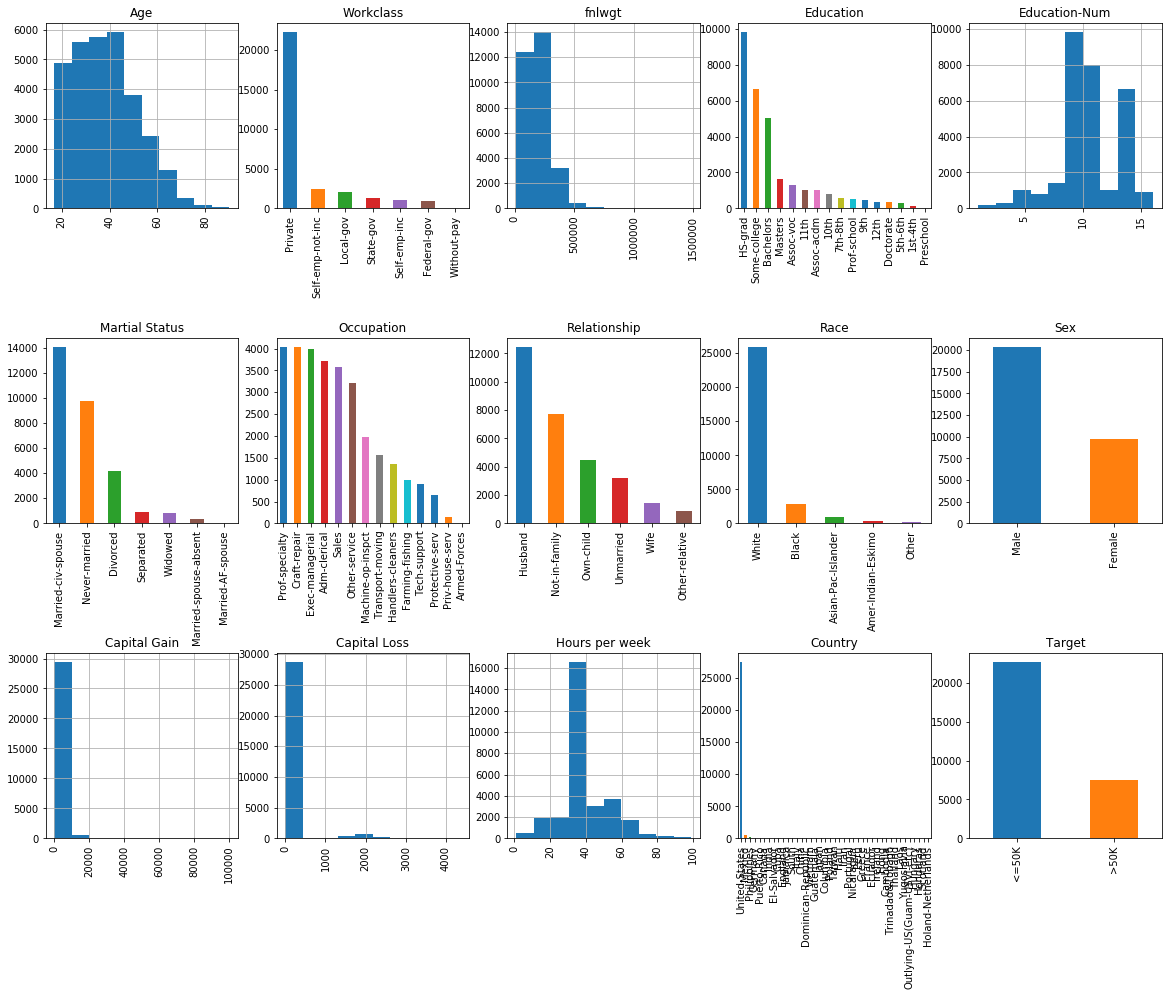

In [34]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(nadult.shape[1]) / cols)
for i, column in enumerate(nadult.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if nadult.dtypes[column] == np.object:
        nadult[column].value_counts().plot(kind="bar", axes=ax)
    else:
        nadult[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [35]:
TargetRace = pd.crosstab(nadult["Target"],nadult["Race"],margins=True)
TargetRace

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
Target,,,,,,
<=50K,252,647,2451,210,19094,22654
>50K,34,248,366,21,6839,7508
All,286,895,2817,231,25933,30162


In [36]:
def percent(colum):
    return colum*100//float(colum[-1])

TargetSex = pd.crosstab(nadult["Target"], nadult["Sex"],margins = True)
TargetSex
TargetSex.apply(percent,axis=0)

Sex,Female,Male,All
Target,,,
<=50K,88.0,68.0,75.0
>50K,11.0,31.0,24.0
All,100.0,100.0,100.0


In [37]:
nadult["Country"].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Taiwan                           42
Haiti                            42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [38]:
nadult["Occupation"].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: Occupation, dtype: int64

In [39]:
testAdult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [40]:
nTestAdult = testAdult.dropna()

 - The ' Target ' column of the original data file ' adult. Test ' has a '. ' (dot) at the end of each label. For example: ' > 50k. '. What prevented the comparison of accuracy because in the file ' adult. Data ' The labels of the column ' Target ' did not have this endpoint. So the following command removes the endpoint of all labels in the ' Target ' column

In [41]:
nTestAdult['Target'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')

In [42]:
nTestAdult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


### Use of algorithms

In [43]:
neighbors = [3,5,7,9,11,13,15,17,19,21,23,25, 27, 29, 31, 35]
Xadult = nadult[["Age","Education-Num","Capital Gain", "Capital Loss", "Hours per week"]]
Yadult = nadult.Target
XtestAdult = nTestAdult[["Age","Education-Num","Capital Gain", "Capital Loss", "Hours per week"]]
YtestAdult = nTestAdult.Target

In [44]:
# Here, we define a function that test (with CV equal to 3) various K-nn and yours misclassification error

print('With CV = 3:')
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xadult, Yadult, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

With CV = 3:
The optimal number of neighbors is 19


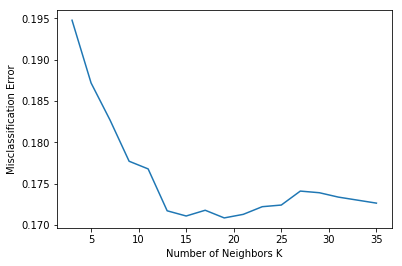

In [45]:
# Plot a graph that show us the perfomance of the K-nn with each number of neighbors (in this case, the CV is equal to 3)

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [46]:
print('With CV = 5:')
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xadult, Yadult, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
        
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

With CV = 5:
The optimal number of neighbors is 23


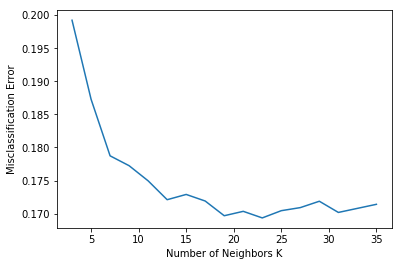

In [47]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [48]:
print('With CV = 10:')
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xadult, Yadult, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
        
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

With CV = 10:
The optimal number of neighbors is 31


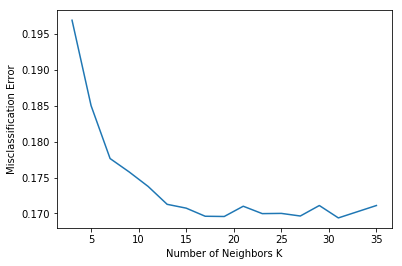

In [49]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [50]:
print('With CV = 15:')
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xadult, Yadult, cv=15, scoring='accuracy')
    cv_scores.append(scores.mean())
    values = np.array([5,8,9,10,20,30,50,100])
        
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

With CV = 15:
The optimal number of neighbors is 19


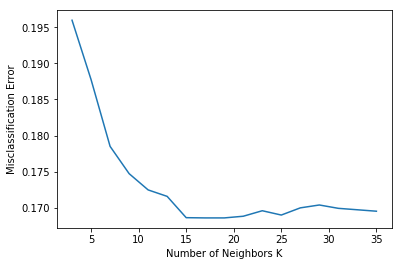

In [51]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [52]:
print('With CV = 20:')
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xadult, Yadult, cv=20, scoring='accuracy')
    cv_scores.append(scores.mean())
    values = np.array([5,8,9,10,20,30,50,100])
        
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

With CV = 20:
The optimal number of neighbors is 21


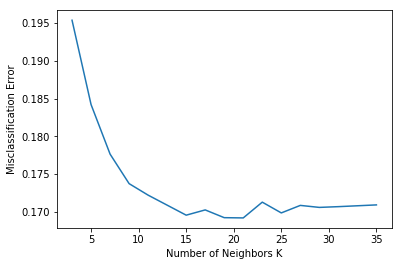

In [53]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

 - As we can see above, there are some K values, which would lead to the highest accuracy.

In [54]:
knn = KNeighborsClassifier(n_neighbors=31)

In [55]:
scores = cross_val_score(knn, Xadult, Yadult, cv=10)

In [56]:
scores

array([0.82764335, 0.83261518, 0.82565462, 0.83095791, 0.82824934,
       0.83753316, 0.82427056, 0.83554377, 0.8318408 , 0.8318408 ])

In [57]:
knn.fit(Xadult,Yadult)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')

In [58]:
YtestPred = knn.predict(XtestAdult)

In [59]:
YtestPred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype=object)

In [60]:
accuracy_score(YtestAdult,YtestPred)

0.8341301460823373

In [61]:
knn = KNeighborsClassifier(n_neighbors=15)

In [62]:
scores = cross_val_score(knn, Xadult, Yadult, cv=15)

In [63]:
scores

array([0.82554672, 0.83399602, 0.82852883, 0.82306163, 0.83341621,
       0.82744903, 0.83291895, 0.82595724, 0.85024876, 0.82189055,
       0.83084577, 0.8358209 , 0.83432836, 0.83233831, 0.83432836])

In [64]:
knn.fit(Xadult,Yadult)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [65]:
YtestPred = knn.predict(XtestAdult)

In [66]:
YtestPred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [67]:
accuracy_score(YtestAdult,YtestPred)

0.8311420982735723

 - Best accuracy was 0.8341301460823373 with CV = 10 and K = 31

# 4. Nayve Bayes (SMS Spam Collection)

### Environment Setting

Before we start we need set up the environment, please make sure those packages are installed in your computer when you copy this code to the local file.

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
#Importing stuff that I will need in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import feature_extraction, model_selection, naive_bayes, metrics
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,fbeta_score
from scipy import stats

### Read Data File

The first task is to read data from .csv file.

In [70]:
spam = pd.read_csv( 'C:/train_data.csv')

In [71]:
print ("database size: ", spam.shape)

database size:  (3680, 59)


In [72]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
0,0.0,14.28,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000,0.0,0.000,0.000,0.0,1.800,5,9,True,1947
1,0.0,0.00,1.0,0.0,0.50,0.0,0.0,0.00,0.0,0.50,...,0.357,0.0,0.892,0.000,0.0,2.000,19,172,False,2159
2,0.0,0.00,0.0,0.0,0.00,0.0,0.0,1.29,0.0,0.43,...,0.124,0.0,0.310,0.062,0.0,1.477,8,65,False,4223
3,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000,0.0,0.444,0.000,0.0,2.800,7,28,True,2624
4,0.0,0.00,0.0,0.0,1.17,0.0,0.0,0.00,0.0,1.17,...,0.000,0.0,0.000,0.000,0.0,1.551,10,45,True,2743


In [73]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 59 columns):
word_freq_make                3680 non-null float64
word_freq_address             3680 non-null float64
word_freq_all                 3680 non-null float64
word_freq_3d                  3680 non-null float64
word_freq_our                 3680 non-null float64
word_freq_over                3680 non-null float64
word_freq_remove              3680 non-null float64
word_freq_internet            3680 non-null float64
word_freq_order               3680 non-null float64
word_freq_mail                3680 non-null float64
word_freq_receive             3680 non-null float64
word_freq_will                3680 non-null float64
word_freq_people              3680 non-null float64
word_freq_report              3680 non-null float64
word_freq_addresses           3680 non-null float64
word_freq_free                3680 non-null float64
word_freq_business            3680 non-null float64
word_freq

### Brief Analysis

Here, we're going to analyze the data and its features to understand their correlations.

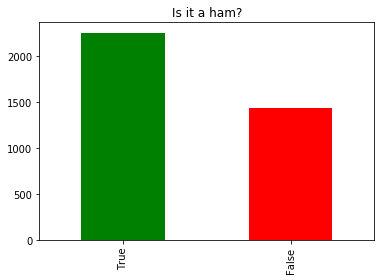

In [74]:
# Plot a graph with the proportions of spam or ham in our data

count_Class=pd.value_counts(spam["ham"], sort= True)
count_Class.plot(kind= 'bar', color= ["green", "red"])
plt.title('Is it a ham?')
plt.show()

In [75]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Id
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,...,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.099677,0.223353,0.279019,0.069117,0.314897,0.096147,0.113372,0.107397,0.088519,0.242079,...,0.041071,0.138068,0.017707,0.273364,0.075168,0.043326,5.364929,52.831250,283.316304,2297.439674
std,0.298270,1.337420,0.508617,1.438505,0.697633,0.277443,0.400638,0.411901,0.265593,0.671435,...,0.257327,0.268595,0.111465,0.872148,0.239671,0.345457,33.811679,210.367337,623.433481,1324.109165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.590000,6.000000,34.000000,1160.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.280000,14.000000,93.000000,2298.000000
75%,0.000000,0.000000,0.410000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.191000,0.000000,0.313250,0.050000,0.000000,3.716000,43.000000,270.500000,3445.250000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,13.129000,1102.500000,9989.000000,15841.000000,4600.000000


In [76]:
# Drop the columns that is not about frquency

train2 = spam.drop(columns = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'Id'])

# Separate the ham and spam for better analisys

HAMdata = train2[train2['ham']==True]
SPAMdata = train2[train2['ham']==False]

# Drop the column that classify if it is ham or not

HAMdata.drop(columns = ['ham'])
SPAMdata.drop(columns = ['ham'])

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
1,0.00,0.00,1.00,0.00,0.50,0.00,0.00,0.00,0.00,0.50,...,0.50,0.00,0.00,0.0,0.000,0.357,0.000,0.892,0.000,0.000
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.43,...,0.00,0.00,0.00,0.0,0.000,0.124,0.000,0.310,0.062,0.000
6,0.00,0.00,0.37,0.00,0.00,0.00,0.37,0.00,0.00,0.00,...,0.00,0.00,0.37,0.0,0.000,0.302,0.000,0.241,0.060,0.000
14,0.00,0.00,0.00,0.00,2.17,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000
15,0.00,0.00,0.00,0.00,0.94,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.000,0.000,0.000,0.428,0.000,0.000
16,0.00,0.00,1.42,0.00,0.71,0.00,0.00,0.71,0.00,0.71,...,0.00,0.00,0.00,0.0,0.000,0.000,0.000,0.931,0.000,0.000
19,2.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.000,0.000,0.000,0.277,0.000,0.000
20,0.00,0.00,0.00,0.00,0.00,0.79,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.000,0.147,0.000,0.000,0.000,0.000
26,0.31,0.20,0.72,0.00,0.00,0.62,0.00,0.62,0.62,0.93,...,0.00,0.00,0.00,0.0,0.000,0.000,0.000,0.548,0.199,0.033
27,0.32,0.16,0.56,0.00,0.32,0.24,0.04,1.16,0.40,0.40,...,0.12,0.00,0.00,0.0,0.019,0.052,0.066,0.370,0.152,0.000


In [77]:
# Discovering some information about our data that can be useful

HAMline = HAMdata.shape[0]
SPAMline = SPAMdata.shape[0]
ALLlines = SPAMline + HAMline
SPAMperc = SPAMline * 100 / ALLlines
HAMperc = HAMline * 100 / ALLlines

print('     Useful Information')
print()
print ("HAM data size: ", HAMdata.shape)
print ("SPAM data size: ", SPAMdata.shape)
print("HAM percentage: ", HAMperc)
print("SPAM percentage: ", SPAMperc)

     Useful Information

HAM data size:  (2251, 55)
SPAM data size:  (1429, 55)
HAM percentage:  61.16847826086956
SPAM percentage:  38.83152173913044


In [78]:
# Set the frequency of words and chars in the non-spam email


sums1 = HAMdata.select_dtypes(pd.np.number).sum().rename('total')
print('Frequency of words and chars in the non-spam email')
print()
print(sums1)

Frequency of words and chars in the non-spam email

word_freq_make           156.160
word_freq_address        581.110
word_freq_all            450.230
word_freq_3d               2.470
word_freq_our            423.690
word_freq_over           105.850
word_freq_remove          21.220
word_freq_internet        89.540
word_freq_order           83.680
word_freq_mail           389.020
word_freq_receive         50.360
word_freq_will          1227.400
word_freq_people         136.860
word_freq_report         103.870
word_freq_addresses       20.080
word_freq_free           165.720
word_freq_business       105.200
word_freq_email          229.280
word_freq_you           2771.500
word_freq_credit          19.110
word_freq_your           978.750
word_freq_font           118.100
word_freq_000             16.450
word_freq_money           42.170
word_freq_hp            2033.240
word_freq_hpl            982.460
word_freq_george        2786.900
word_freq_650            436.730
word_freq_lab           

In [79]:
# Set the frequency of words and chars in the spam email

sums2 = SPAMdata.select_dtypes(pd.np.number).sum().rename('total')
print('Frequency of words and chars in the spam email')
print()
print(sums2)

Frequency of words and chars in the spam email

word_freq_make           210.650
word_freq_address        240.830
word_freq_all            576.560
word_freq_3d             251.880
word_freq_our            735.130
word_freq_over           247.970
word_freq_remove         395.990
word_freq_internet       305.680
word_freq_order          242.070
word_freq_mail           501.830
word_freq_receive        171.390
word_freq_will           791.460
word_freq_people         204.900
word_freq_report         117.340
word_freq_addresses      153.960
word_freq_free           767.390
word_freq_business       392.450
word_freq_email          441.520
word_freq_you           3191.160
word_freq_credit         297.550
word_freq_your          1974.310
word_freq_font           351.880
word_freq_000            339.120
word_freq_money          305.100
word_freq_hp              21.150
word_freq_hpl             10.330
word_freq_george           2.430
word_freq_650             29.070
word_freq_lab              0

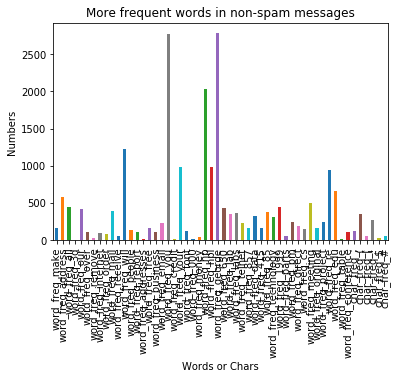

In [80]:
# Plot the graph of more frequent words in non-spam messages

sums1.plot.bar(legend = False)
plt.title('More frequent words in non-spam messages')
plt.xlabel('Words or Chars')
plt.ylabel('Numbers')
plt.show()

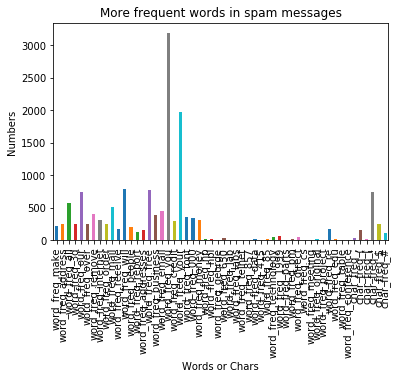

In [81]:
# Plot the graph of more frequent words in spam messages

sums2.plot.bar(legend = False)
plt.title('More frequent words in spam messages')
plt.xlabel('Words or Chars')
plt.ylabel('Numbers')
plt.show()

 - As we can see, the frequency of "you" in both classifications of emails are very high, but, in terms of "your", the spam messages have this word more frequently. So, we will drop only the frequency of "you" (it is not meaningful).

In [82]:
spam.drop(columns = ['word_freq_you'])

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
0,0.00,14.28,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,1.800,5,9,True,1947
1,0.00,0.00,1.00,0.0,0.50,0.00,0.00,0.00,0.00,0.50,...,0.357,0.000,0.892,0.000,0.000,2.000,19,172,False,2159
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.29,0.00,0.43,...,0.124,0.000,0.310,0.062,0.000,1.477,8,65,False,4223
3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.444,0.000,0.000,2.800,7,28,True,2624
4,0.00,0.00,0.00,0.0,1.17,0.00,0.00,0.00,0.00,1.17,...,0.000,0.000,0.000,0.000,0.000,1.551,10,45,True,2743
5,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.022,0.019,0.022,0.022,0.022,3.482,5,5902,True,3451
6,0.00,0.00,0.37,0.0,0.00,0.00,0.37,0.00,0.00,0.00,...,0.302,0.000,0.241,0.060,0.000,2.166,18,143,False,464
7,0.00,3.03,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.03,...,0.000,0.000,0.000,0.000,0.000,2.769,21,36,True,3219
8,0.09,0.00,0.48,0.0,0.00,0.29,0.00,0.00,0.00,0.09,...,0.030,0.000,0.000,0.046,0.000,1.722,17,267,True,3007
9,0.00,0.00,0.66,0.0,0.00,0.66,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,1.142,4,56,True,1549


 -  - Moreover, we can notice that "hp", "hpl" and "george" are very frequent in non-spam messages (compared to the frequency in spam messages), maybe, this information will be useful posteriorly.

In [83]:
# Set the frequency of words and chars in each non-spam email

sums1FRACTION = sums1 / HAMline

# Set the frequency of words and chars in each spam email

sums2FRACTION = sums2 / SPAMline

In [84]:
# Set the difference between frequencies of words and chars

difSums = sums2FRACTION - sums1FRACTION
print(difSums)

word_freq_make          0.078037
word_freq_address      -0.089626
word_freq_all           0.203458
word_freq_3d            0.175166
word_freq_our           0.326214
word_freq_over          0.126503
word_freq_remove        0.267683
word_freq_internet      0.174134
word_freq_order         0.132224
word_freq_mail          0.178355
word_freq_receive       0.097565
word_freq_will          0.008587
word_freq_people        0.082587
word_freq_report        0.035969
word_freq_addresses     0.098819
word_freq_free          0.463391
word_freq_business      0.227898
word_freq_email         0.207114
word_freq_you           1.001911
word_freq_credit        0.199733
word_freq_your          0.946796
word_freq_font          0.193777
word_freq_000           0.230005
word_freq_money         0.194772
word_freq_hp           -0.888460
word_freq_hpl          -0.429226
word_freq_george       -1.236371
word_freq_650          -0.173673
word_freq_lab          -0.157222
word_freq_labs         -0.159502
word_freq_

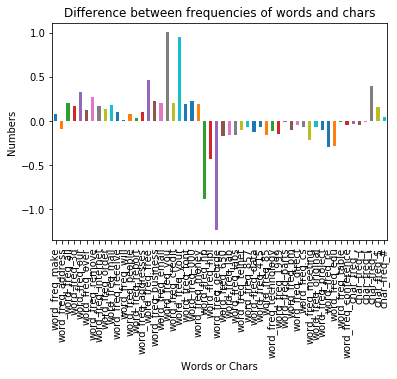

In [85]:
# Plot the graph of the difference between frequencies of words and chars

difSums.plot.bar(legend = False)
plt.title('Difference between frequencies of words and chars')
plt.xlabel('Words or Chars')
plt.ylabel('Numbers')
plt.show()

 - Here, we will peparate in groups (for length analysis)

In [86]:
# Drop the columns that is about frquency and the Id column

columns = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'ham']
train3 = pd.DataFrame(spam, columns=columns)

In [87]:
# Separate the ham and spam for better analisys

HAMcarac = train3[train3['ham']==True]
SPAMcarac = train3[train3['ham']==False]

In [88]:
# Drop the column that classify if it is ham or not

HAMcarac.drop(columns = ['ham'])
SPAMcarac.drop(columns = ['ham'])

,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1,2.000,19,172
2,1.477,8,65
6,2.166,18,143
14,1.333,5,16
15,4.652,31,107
16,12.055,117,217
19,3.200,13,48
20,2.913,27,67
26,14.301,685,1516
27,3.225,181,1500


In [89]:
# Set the rate of the types of length in the non-spam email

sums3 = HAMcarac.select_dtypes(pd.np.number).sum().rename('total')
sums3FRACTION = sums3 / HAMline
print('Rate of the types of length in the non-spam email')
print()
print(sums3FRACTION)

Rate of the types of length in the non-spam email

capital_run_length_average      2.397710
capital_run_length_longest     18.269658
capital_run_length_total      158.898267
Name: total, dtype: float64


In [90]:
# Set the rate of the types of length in the spam email

sums4 = SPAMcarac.select_dtypes(pd.np.number).sum().rename('total')
sums4FRACTION = sums4 / SPAMline
print('Rate of the types of length in the spam email')
print()
print(sums4FRACTION)

Rate of the types of length in the spam email

capital_run_length_average     10.038973
capital_run_length_longest    107.273618
capital_run_length_total      479.303009
Name: total, dtype: float64


  - As we can see above, the average length of uninterrupted sequences of capital letters (capital_run_length_average), the length of longest uninterrupted sequence of capital letters (capital_run_length_longest) and the total number of capital letters in the e-mail (capital_run_length_total) are commonly larger in spam emails. That is, spam emails tend to be more extensive and prolix than the non-spam emails.

### Use of algorithms

In [91]:
#Spliting the data in target(output) and features(input)

outputDATA = spam['ham']
inputDATA = spam.drop(columns=['ham'])

In [92]:
#Spliting the data in train output, train inputs, test output and test inputs

data_train, data_test, target_train, target_test = train_test_split(
    inputDATA,
    outputDATA,
    random_state = 0) 

In [93]:
#Creating the object pertaining to the Naive Bayes classifier for normal probability distribution.

gnb = GaussianNB()
gnb.fit(data_train, target_train)

#Predicting with Naive Bayes classifier

predictions = gnb.predict(data_train)
print(predictions)

[False False  True ... False False False]


In [94]:
print ('Accuracy Score: ' + str(accuracy_score(target_train, predictions)))
print()
print (classification_report(target_train, predictions))
print (confusion_matrix(target_train, predictions))

Accuracy Score: 0.825

             precision    recall  f1-score   support

      False       0.70      0.97      0.81      1097
       True       0.97      0.73      0.83      1663

avg / total       0.86      0.82      0.83      2760

[[1060   37]
 [ 446 1217]]


In [95]:
print('     Confusion Matrix')
m_confusion_test = metrics.confusion_matrix(target_train, predictions)
pd.DataFrame(m_confusion_test, columns = ['Predicted Ham', 'Predicted Spam'],
            index = ['Actual Ham', 'Actual Spam'])

     Confusion Matrix


,Predicted Ham,Predicted Spam
Actual Ham,1060,37
Actual Spam,446,1217


In [96]:
# Setting some information that will be useful

TP = m_confusion_test[0][0]
TN = m_confusion_test[1][1]
FP = m_confusion_test[1][0]
FN = m_confusion_test[0][1]
Trues = TP + TN
Falses = FP + FN
All = TP + TN + FP + FN
recall = TP / (TP + FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)

In [97]:
print('Recall:', recall)
print('Precision:', precision)
print('Specificity:', specificity)

Recall: 0.9662716499544212
Precision: 0.703851261620186
Specificity: 0.7318099819603127


In [98]:
CVlist = [5, 7, 9, 10, 13, 15, 17, 20, 23, 25, 27, 30]
for i in CVlist:
    scores = cross_val_score(gnb, data_train, target_train, cv=i)
    strI = str(i)
    mean = str(np.mean(scores))
    print('Scores with CV equal to ' + strI)
    print(scores)
    print()
    print('Mean of scores: ' + mean)
    print()
    print()

Scores with CV equal to 5
[0.84448463 0.80289331 0.82065217 0.83666062 0.82214156]

Mean of scores: 0.8253664580577323


Scores with CV equal to 7
[0.83544304 0.82531646 0.81265823 0.82531646 0.81472081 0.8346056
 0.82951654]

Mean of scores: 0.8253681609717872


Scores with CV equal to 9
[0.84039088 0.83387622 0.78501629 0.84364821 0.82084691 0.80781759
 0.83387622 0.8496732  0.80983607]

Mean of scores: 0.8249979534324148


Scores with CV equal to 10
[0.84115523 0.85559567 0.79783394 0.80797101 0.85144928 0.78623188
 0.82246377 0.84727273 0.85090909 0.8       ]

Mean of scores: 0.8260882597755931


Scores with CV equal to 13
[0.84976526 0.83098592 0.84507042 0.8028169  0.81690141 0.8254717
 0.81132075 0.78301887 0.84433962 0.84433962 0.81132075 0.86792453
 0.79620853]

Mean of scores: 0.825344945074275


Scores with CV equal to 15
[0.84864865 0.83243243 0.86956522 0.80978261 0.76086957 0.8423913
 0.83152174 0.80434783 0.79347826 0.82065217 0.82608696 0.84782609
 0.82608696 0.85245902

 - The best score (0.8260882597755931) found was with CV equal to 10

# 5. Neural Networks (MNIST)

### Environment Setting

Before we start we need set up the environment, please make sure those packages are installed in your computer when you copy this code to the local file.

In [99]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


### Read Data File

The first task is to read data from .csv file.

In [100]:
numbers = pd.read_csv("D:/tarefa3/mnist.csv")

### Brief Analysis

Here, we're going to analyze the data and its features to understand their correlations.

In [101]:
numbers.head(7)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 - As we can see above, this database is different from the others. It contains a lot of features (called by pixels), because, each line of this database can form an image (except the feature 'label'). In other hand, the feature 'label' tell us what number is formed by this hundreds of pixels.

In [102]:
Y_numbers = numbers["label"]

# Drop 'label' column

X_numbers = numbers.drop(labels = ["label"],axis = 1) 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

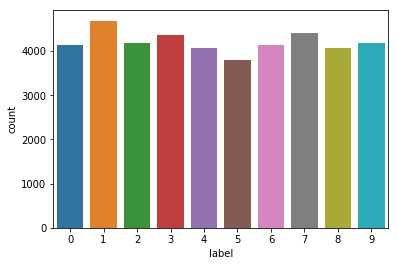

In [103]:
g = sns.countplot(Y_numbers)

Y_numbers.value_counts()

 - Here, we can see how many images of each digit there are in our database.

In [104]:
# Check if there are missing data

X_numbers.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [105]:
# Normalize the data

X_numbers = X_numbers / 255.0

In [106]:
# Reshape image in 3 dimensions 

X_numbers = X_numbers.values.reshape(-1,28,28,1)

 - Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors. Thus, if a label is 4, we will have something like (0 0 0 0 1 0 0 0 0 0).

In [107]:
# Encode labels to one hot vectors

Y_numbers = to_categorical(Y_numbers, num_classes = 10)

In [108]:
# Set the random seed

random_seed = 2

###  Use of algorithms

In [109]:
# Split the train and the validation set for the fitting

X_train, X_val, Y_train, Y_val = train_test_split(X_numbers, Y_numbers, test_size = 0.1, random_state=random_seed)

 - I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.
 <br /><br />
 - The second important layer is the pooling MaxPool2D. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting.
 <br /><br />
 - Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

In [110]:
model = Sequential()


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

 - Now, we will set a function that iteratively improves parameters (filters kernel values, weights and bias of neurons) in order to minimise the loss.

In [111]:
# Define the optimizer (using default values)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [112]:
# Compile the model

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

 - In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR). It is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

In [113]:
# Set a learning rate annealer

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [114]:
epochs = 1
batch_size = 86

 - In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

In [115]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [116]:
# Fit the model

history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/1
 - 319s - loss: 0.4175 - acc: 0.8684 - val_loss: 0.0817 - val_acc: 0.9745


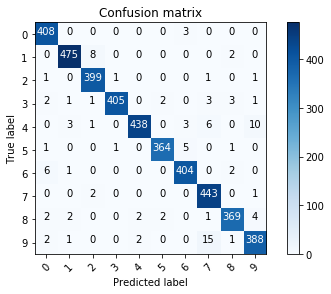

In [117]:
#  This function prints and plots the confusion matrix.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)



    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

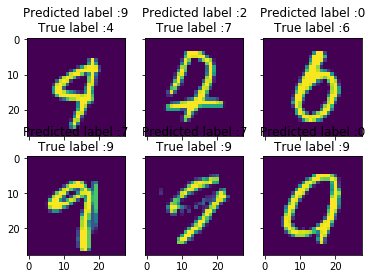

In [118]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

# This function shows 6 images with their predicted and real labels

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
